# Thompson Sampling

## Importing the libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [29]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [30]:
import random #pq usamos beta distributions (probabilidades)
#parametros iguais ao UCB
N = 10000 #numero users
d = 10 #10 ads
ads_selected = [] #lista para guardar selecionadas
numbers_of_rewards_1 = [0] * d #numero de 1s
numbers_of_rewards_0 = [0] * d #numero de 0s
total_reward = 0
for n in range(0, N): #rondas
    ad = 0
    max_random = 0
    for i in range(0, d): #percorrer as ads
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1) #random draw da beta distribution
        if random_beta > max_random: #caso seja maior ao max random
            max_random = random_beta #max random fica esse valor
            ad = i
    ads_selected.append(ad) #adicionar à lista das ads selected
    reward = dataset.values[n, ad] #buscar a reward (caso a ad seja selecionada pelo user)
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward #soma reward

## Visualising the results - Histogram

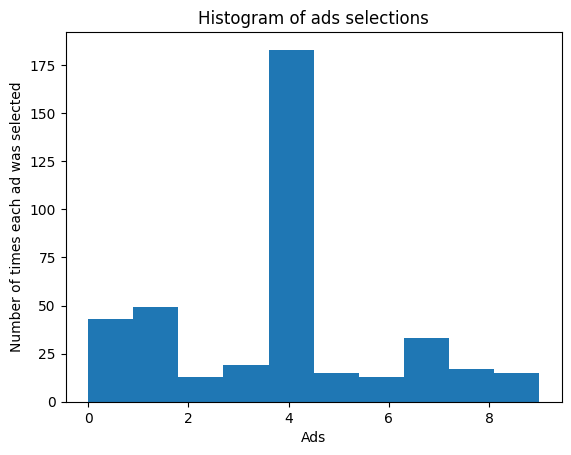

In [31]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()
#verificamos que com 500 (onde o UCB já não dava), com Thompson Sampling é possível.
#Logo o Thompson Sampling é melhor - identifica com menos rondas qual a melhor AD